# Comparison of SGD and GA Approaches for Wind Power Prediction

This notebook compares the performance of Stochastic Gradient Descent (SGD) and Genetic Algorithm (GA) approaches for wind power prediction.

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the Python path
sys.path.append('..')

from src.utils import load_results

## 1. Load Results

In [4]:
# Specify the directories where results are saved
sgd_results_dir = '../results/20241018_014324'
ga_results_dir = '../results/20241018_023134'

# Load SGD results
sgd_results = load_results(sgd_results_dir)
print("SGD Results:", sgd_results.keys())

# Load GA results
ga_results = load_results(ga_results_dir)
print("GA Results:", ga_results.keys())

SGD Results: dict_keys(['sgd_model_summary', 'sgd_evaluation_metrics', 'sgd_experiment_params', 'sgd_predictions', 'sgd_training_history'])
GA Results: dict_keys(['ga_fitness_history', 'ga_evaluation_results', 'ga_predictions_plot'])


## 2. Compare Performance Metrics

Performance Comparison:
           SGD        GA
mse   0.026449  0.547886
rmse  0.162632  0.187347
r2    0.586941  0.451857


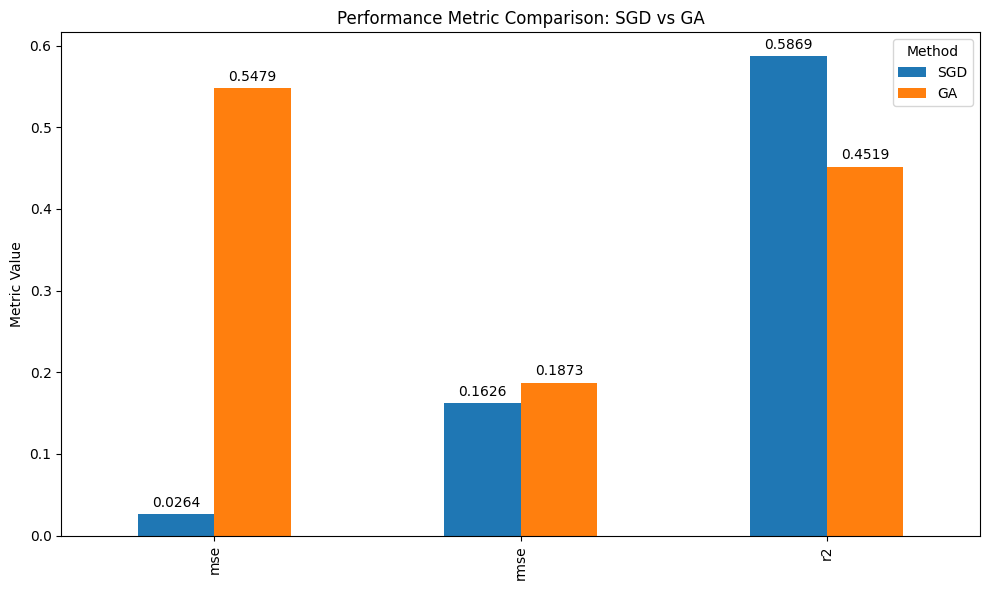

Comparison plot saved as 'sgd_ga_comparison.png'


<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract SGD metrics
sgd_metrics = {
    'mse': sgd_results['sgd_evaluation_metrics']['test_mse'],
    'rmse': sgd_results['sgd_evaluation_metrics']['test_rmse'],
    'r2': sgd_results['sgd_evaluation_metrics']['test_r2']
}

# Parse GA metrics from string
ga_metrics = {}
ga_results_str = ga_results['ga_evaluation_results']
for line in ga_results_str.split('\n'):
    if ':' in line:
        key, value = line.split(':')
        ga_metrics[key.strip()] = float(value.strip())

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'SGD': sgd_metrics,
    'GA': ga_metrics
})

print("Performance Comparison:")
print(comparison_df)

# Bar plot of metrics
ax = comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metric Comparison: SGD vs GA')
plt.ylabel('Metric Value')
plt.legend(title='Method')
plt.tight_layout()

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)

plt.show()

# Save the plot
plt.savefig('sgd_ga_comparison.png')
print("Comparison plot saved as 'sgd_ga_comparison.png'")

## 3. Compare Training History

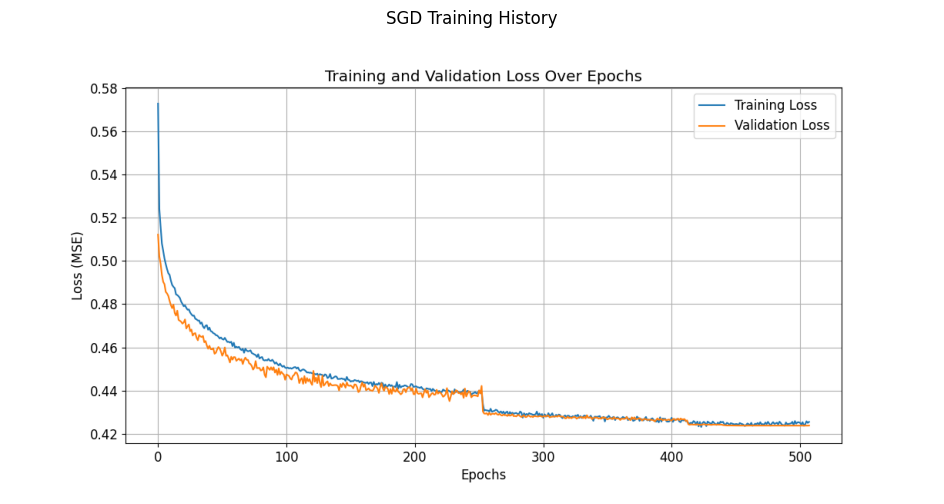

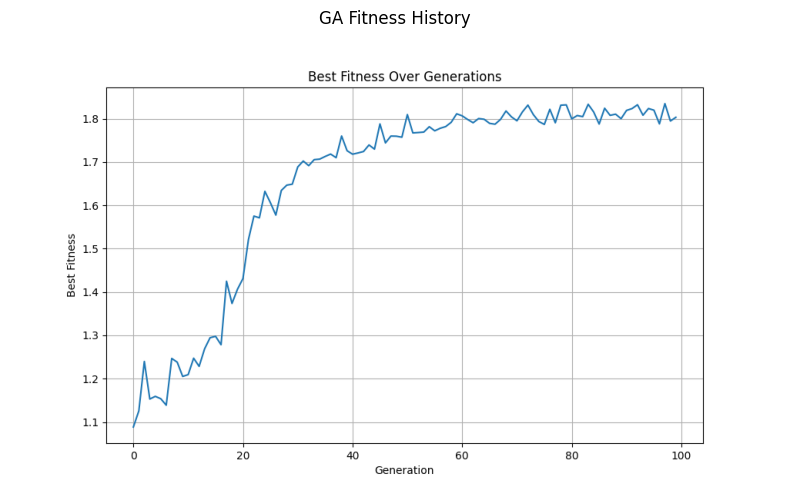

In [9]:
# Display SGD training history
sgd_history_img = plt.imread(sgd_results['sgd_training_history'])
plt.figure(figsize=(12, 6))
plt.imshow(sgd_history_img)
plt.axis('off')
plt.title('SGD Training History')
plt.show()

# Display GA training history
ga_history_img = plt.imread(ga_results['ga_fitness_history'])
plt.figure(figsize=(12, 6))
plt.imshow(ga_history_img)
plt.axis('off')
plt.title('GA Fitness History')
plt.show()

## 4. Compare Predictions

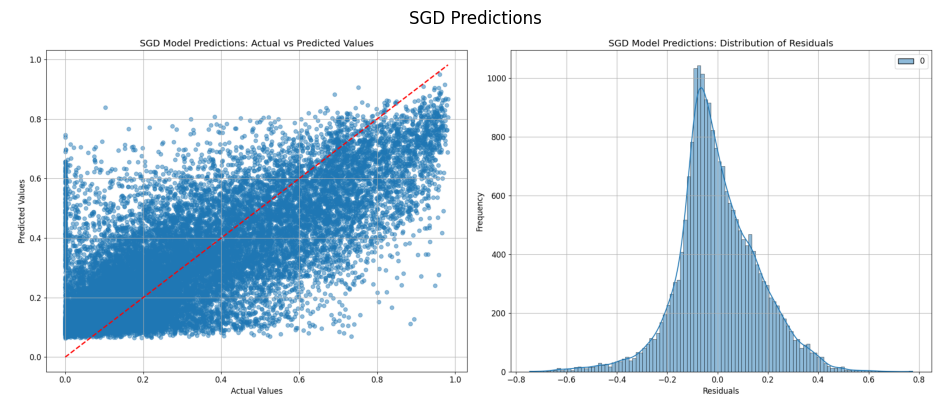

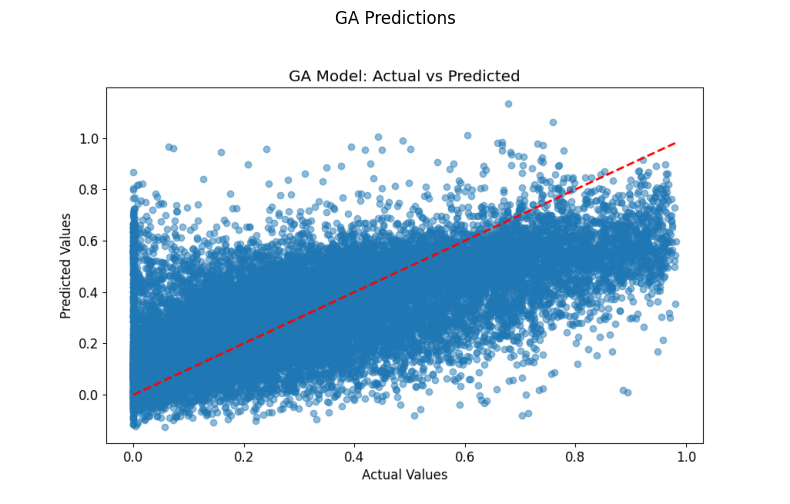

In [14]:
# Display SGD predictions
sgd_predictions_img = plt.imread(sgd_results['sgd_predictions'])
plt.figure(figsize=(12, 6))
plt.imshow(sgd_predictions_img)
plt.axis('off')
plt.title('SGD Predictions')
plt.show()

# Display GA predictions
ga_predictions_img = plt.imread(ga_results['ga_predictions_plot'])
plt.figure(figsize=(12, 6))
plt.imshow(ga_predictions_img)
plt.axis('off')
plt.title('GA Predictions')
plt.show()

## 5. Conclusion

Based on the comparisons above, we can draw the following conclusions:

1. Performance Metrics: The SGD method outperformed the GA method in terms of MSE (0.0264 vs 0.5479) and R2 score (0.5869 vs 0.4519). However, GA had a slightly higher RMSE (0.1873 vs 0.1626 for SGD). Overall, SGD seems to have better predictive performance.
2. Training Progress: The SGD training history shows a steady decrease in both training and validation loss over 500 epochs, with the model converging around epoch 300. The GA fitness history shows rapid improvement in the first 20 generations, followed by slower but steady improvement up to 100 generations.
3. Predictions: Both methods show a similar pattern of predictions, with a tendency to underestimate higher values and overestimate lower values. However, SGD predictions appear to be more tightly clustered around the ideal prediction line, indicating better overall accuracy.

Overall, the SGD method seems more suitable for this wind power prediction task. It achieved better performance metrics (particularly MSE and R2) and showed a more consistent improvement during training.

Further considerations:
- Computational efficiency: GA required significantly more computational resources per iteration than SGD. Given that SGD achieved better results with 500 epochs compared to GA's 100 generations, SGD was significantly more computationally efficient.
- Potential for improvement: For GA, adjusting mutation and crossover rates, or exploring different selection methods could potentially improve performance.